### Summary of quantitative Variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns

data_path = "./data/" 

In [2]:
state = pd.read_csv(data_path + 'state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
state.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


#### 중심위치 측도

In [4]:
# 평균 : 모든 값의 총합을 값의 개수로 나눈 값
state['Murder.Rate'].mean()

4.066

In [5]:
state['Population'].mean()

6162876.3

In [6]:
# 중앙값, 중위수 : 데이터를 크기에 따라 늘어 놓았을 때 가운데 위치한 값
state['Murder.Rate'].median()

4.0

In [7]:
state['Population'].median()

4436369.5

In [8]:
# 극단값의 영향 
x=pd.Series(np.arange(10))
print("Mean: %.2f, Median: %.2f" %(x.mean(), x.median()))

x[0]=100
print("Mean: %.2f, Median: %.2f" %(x.mean(), x.median()))

Mean: 4.50, Median: 4.50
Mean: 14.50, Median: 5.50


In [9]:
# 최빈값 : 가장 큰 빈도수를 가진 관측치
state['Murder.Rate'].mode()

0    1.6
1    2.0
2    5.7
dtype: float64

In [10]:
# 사분위수: 데이터를 오름차순으로 정렬했을 때, 25%, 50%, 75%에 해당하는 값
# 대략적으로 데이터의 중간 50%가 Q1과 Q3 사이에 들어감
state['Murder.Rate'].quantile([0.25,0.5,0.75, 0.9])

0.25    2.425
0.50    4.000
0.75    5.550
0.90    6.010
Name: Murder.Rate, dtype: float64

In [11]:
state['Murder.Rate'].quantile(0.99)

9.466999999999997

In [12]:
state['Population'].quantile([0.25,0.5,0.75])

0.25    1833004.25
0.50    4436369.50
0.75    6680312.25
Name: Population, dtype: float64

In [13]:
# 십분위수
state['Population'].quantile(np.arange(0,1.1,0.1))

0.0      563626.0
0.1      889558.6
0.2     1353913.0
0.3     2508139.4
0.4     3014731.8
0.5     4436369.5
0.6     5457149.4
0.7     6419552.5
0.8     8940611.8
0.9    12715204.3
1.0    37253956.0
Name: Population, dtype: float64

#### 변동위치 측도

In [16]:
# 범위(range) : 최대값 - 최소값
state['Population'].max() - state['Population'].min()

36690330

In [17]:
# 분산 : 표본분산
state['Population'].var()

46898327373394.445

In [18]:
# 표준편차: 원래의 자료에서 사용된 단위와 동일한 단위로 측정되므로 분산보다 해석에 용이
state['Population'].std()

6848235.347401142

In [19]:
# 사분위수 : Q1과 Q3의 차이, 자료의 중간 50% 범위
# 분산, 표준편차 등은 극단값에 민감한데 비해 IQR은 상대적으로 덜 민감
state['Population'].quantile(0.75) - state['Population'].quantile(0.25) # Q3 - Q1

4847308.0

#### Box Plot

In [21]:
Q1 = state.Population.quantile(0.25)
Q3 = state.Population.quantile(0.75)
IQR = Q3-Q1

In [22]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [23]:
# outliers
state.loc[(state.Population < lower_limit) | 
          (state.Population > upper_limit), "Population"]

4     37253956
8     18801310
31    19378102
42    25145561
Name: Population, dtype: int64

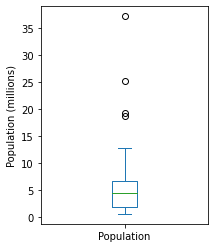

In [24]:
ax = (state.Population/1000000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')
plt.show()

#### Histogram

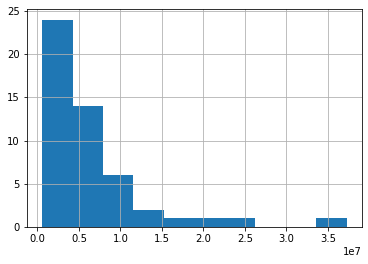

In [26]:
state.Population.hist()
plt.show()

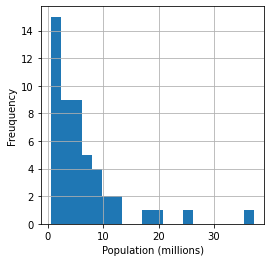

In [27]:
ax = (state.Population/1000000).hist(bins = 20, figsize=(4, 4)) # bins 막대의 갯수 
ax.set_ylabel('Freuquency')
ax.set_xlabel('Population (millions)')
plt.show()

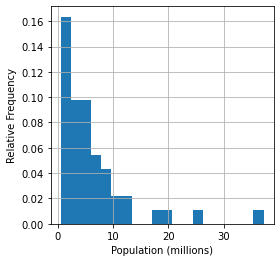

In [28]:
ax = (state.Population/1000000).hist(density = True,bins = 20, figsize=(4, 4)) # bins 막대의 갯수 
ax.set_ylabel('Relative Frequency') # 비율
ax.set_xlabel('Population (millions)')
plt.show()

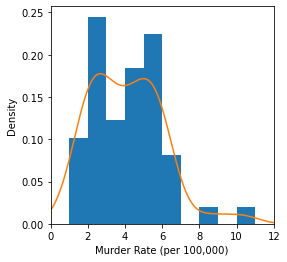

In [29]:
# 밀도 추정
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.show()

#### Q-Q Plot

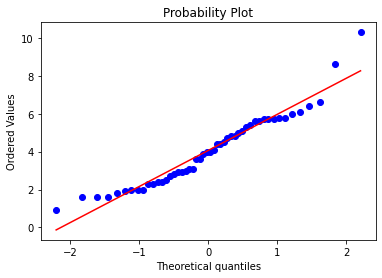

In [31]:
stats.probplot(state['Murder.Rate'], dist="norm", plot=plt)
plt.show()

Airline stats Data
- 일간 비행 지연 비율을 한 달간 기록한 데이터
- 각 범주에 해당하는 수치형 변수의 상자그림을 통해 비교

In [32]:
airline_stats = pd.read_csv(data_path+'airline_stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [33]:
airline_stats.airline.value_counts()

Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: airline, dtype: int64

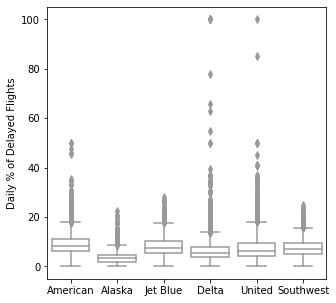

In [34]:
# 범주별 Box Plot
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x="airline", y="pct_carrier_delay", data = airline_stats,
                color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.show()

Text(0, 0.5, 'Daily % of Delayed Flights')

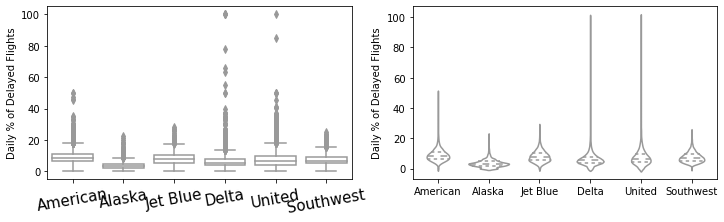

In [36]:
plt.figure(figsize = (12,7))

# tick style transform
plt.subplot(221)
sns.boxplot(x="airline", y="pct_carrier_delay", data = airline_stats,
                color='white')
plt.xlabel('')
plt.ylabel('Daily % of Delayed Flights')
#plt.tick_params(axis = 'x', labelsize = 15)
plt.xticks(fontsize = 15, rotation = 10)

# violin plot
plt.subplot(222)
sns.violinplot(x="airline", y="pct_carrier_delay", data = airline_stats
               , inner='quartile', color='white')
plt.xlabel('')
plt.ylabel('Daily % of Delayed Flights')

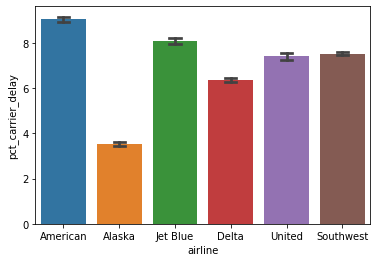

In [38]:
# 범주별 중심위치 측도 Bar plot
# 그룹별 평균으로 Bar plot 생성, Boostrap 기법을 사용한 Confidence interval 함께 그려짐
sns.barplot(x='airline', y='pct_carrier_delay',  data = airline_stats, 
            ci=95, capsize=0.2 , estimator = np.mean) # default로 x별 y의 평균을 계산 confidence interval 95% 
plt.show()

# Jet Blue와 American의 차이가 있는가?
# Jet Blue와 American의 Confidence interval이 겹치지 않기 때문에 차이가 있음

S&P 500 주식 Data
- 'sp500_sectors.csv' : S&P 500에 포함된 종목의 섹터와 symbol 데이터
- 'sp500_data.csv.gz' : S&P 500 종목의 일간 수익률

In [39]:
sp500_sym = pd.read_csv(data_path + 'sp500_sectors.csv')
sp500_px = pd.read_csv(data_path + 'sp500_data.csv.gz', index_col=0)

sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [40]:
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [41]:
sp500_sym.shape, sp500_px.shape

((517, 4), (5647, 517))

In [42]:
# 통신사 주식만 추출

# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

In [43]:
telecom.head()

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000


In [44]:
# ETF 종목만 추출
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

In [46]:
etfs

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.400000,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.520000,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.560000,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.800000,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.480000,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,-0.379997,-0.669998,-1.270004,-1.398679,0.010002,0.279999,-0.069999,-0.497896,-0.750000,-0.200005,-0.309997,-0.059997,-0.229999,0.189994,-0.279999,-0.220002,-0.330002
2015-06-26,-0.040001,-0.700004,-0.389999,-0.079926,0.360001,-0.020001,0.189999,-0.587512,0.259995,-0.010002,0.340000,-0.290001,-0.280002,-0.220001,0.029998,-0.030001,-0.330002
2015-06-29,-0.590000,-1.320000,-2.580002,-1.918189,0.260002,1.829999,-0.080000,-2.280327,-0.500000,-1.089996,-0.160000,-0.769996,-0.700001,-1.180000,-0.500000,-0.330000,-0.450000
2015-06-30,-0.480000,-0.419998,-1.369996,-1.168887,0.130005,0.889999,0.139999,-0.338568,-0.169998,-0.430001,-0.310001,-0.270001,0.259999,-0.510002,-0.580002,-0.150002,-0.269996


#### Heatmap

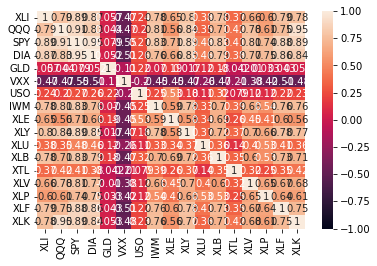

In [47]:
etfs.corr()
sns.heatmap(etfs.corr(), vmin=-1, vmax=1, annot=True)

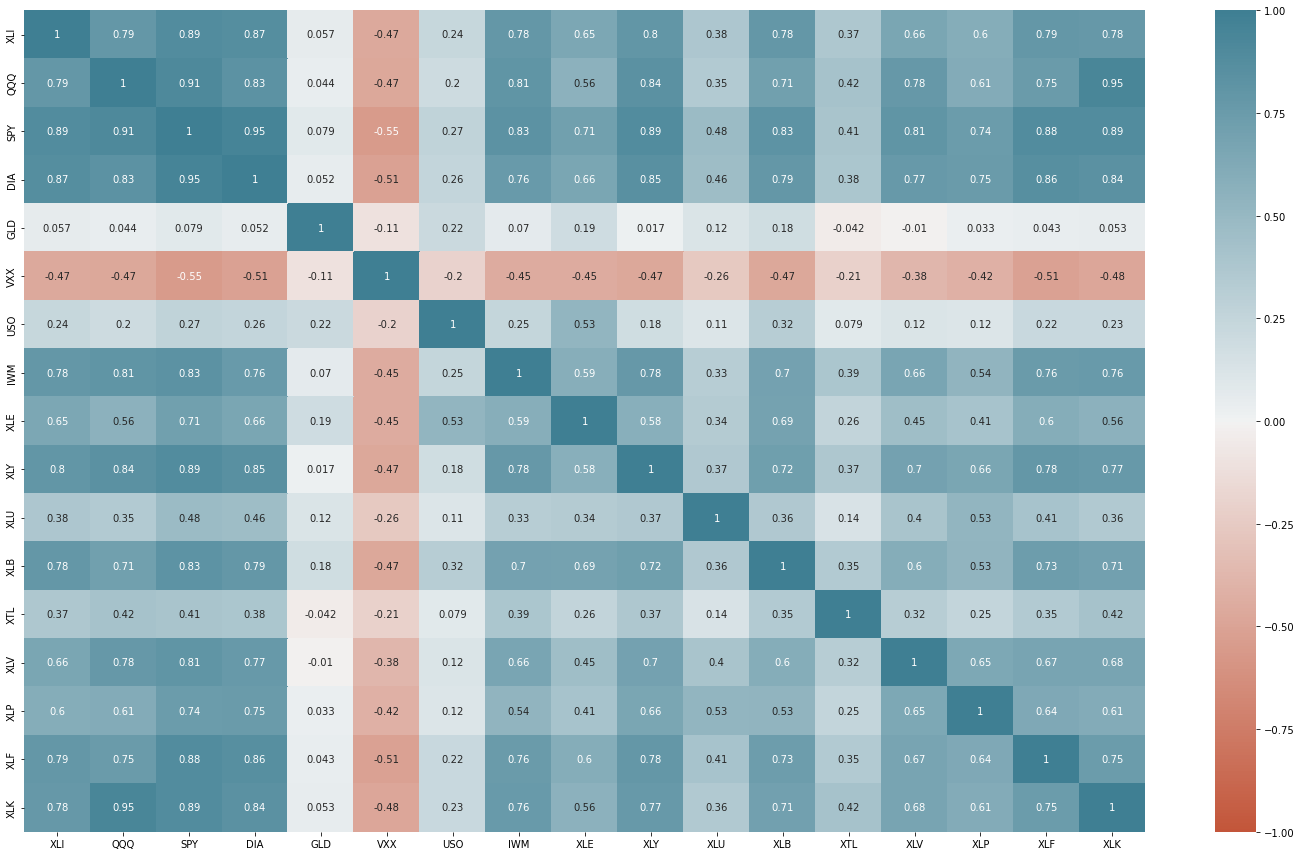

In [48]:
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,annot=True ,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

#### Scatter Plot

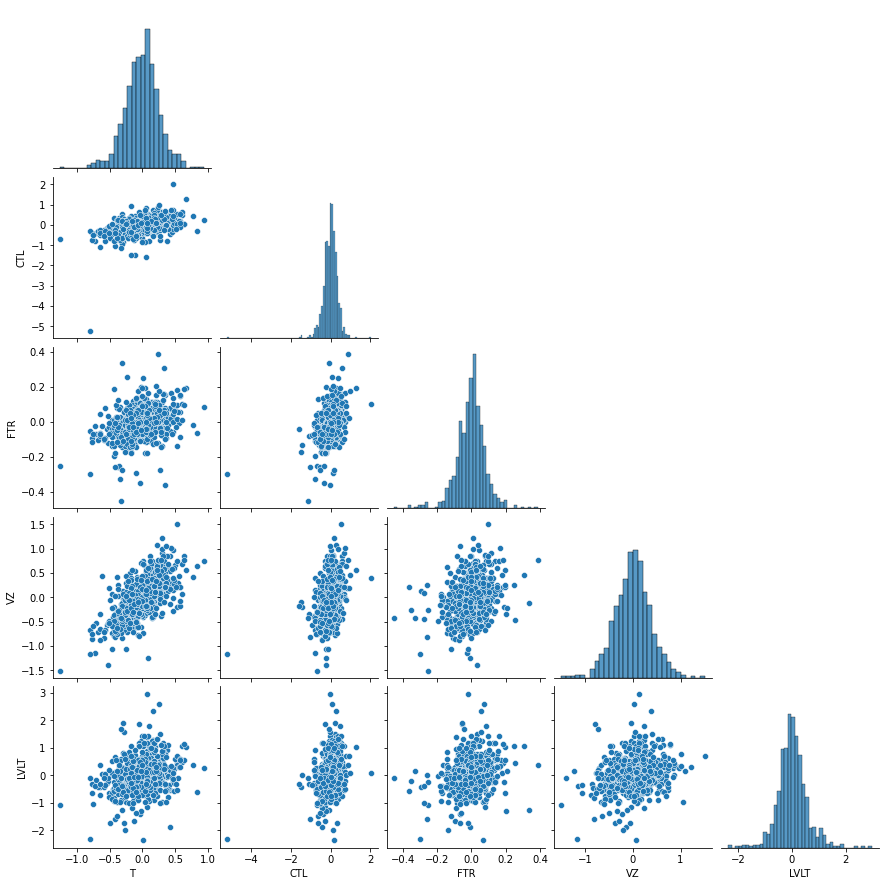

In [51]:
sns.pairplot(telecom, corner=True)
plt.show()

#### Bubble Chart

In [54]:
import plotly.express as px
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [55]:
px.scatter(data_frame=df[df['year'] == 2007], x='gdpPercap', y='lifeExp',
           color='continent', hover_name='country', 
           size='pop', size_max=50) # size는 'pop'에 비례하여 진행을 한다.

#### Facet Grid

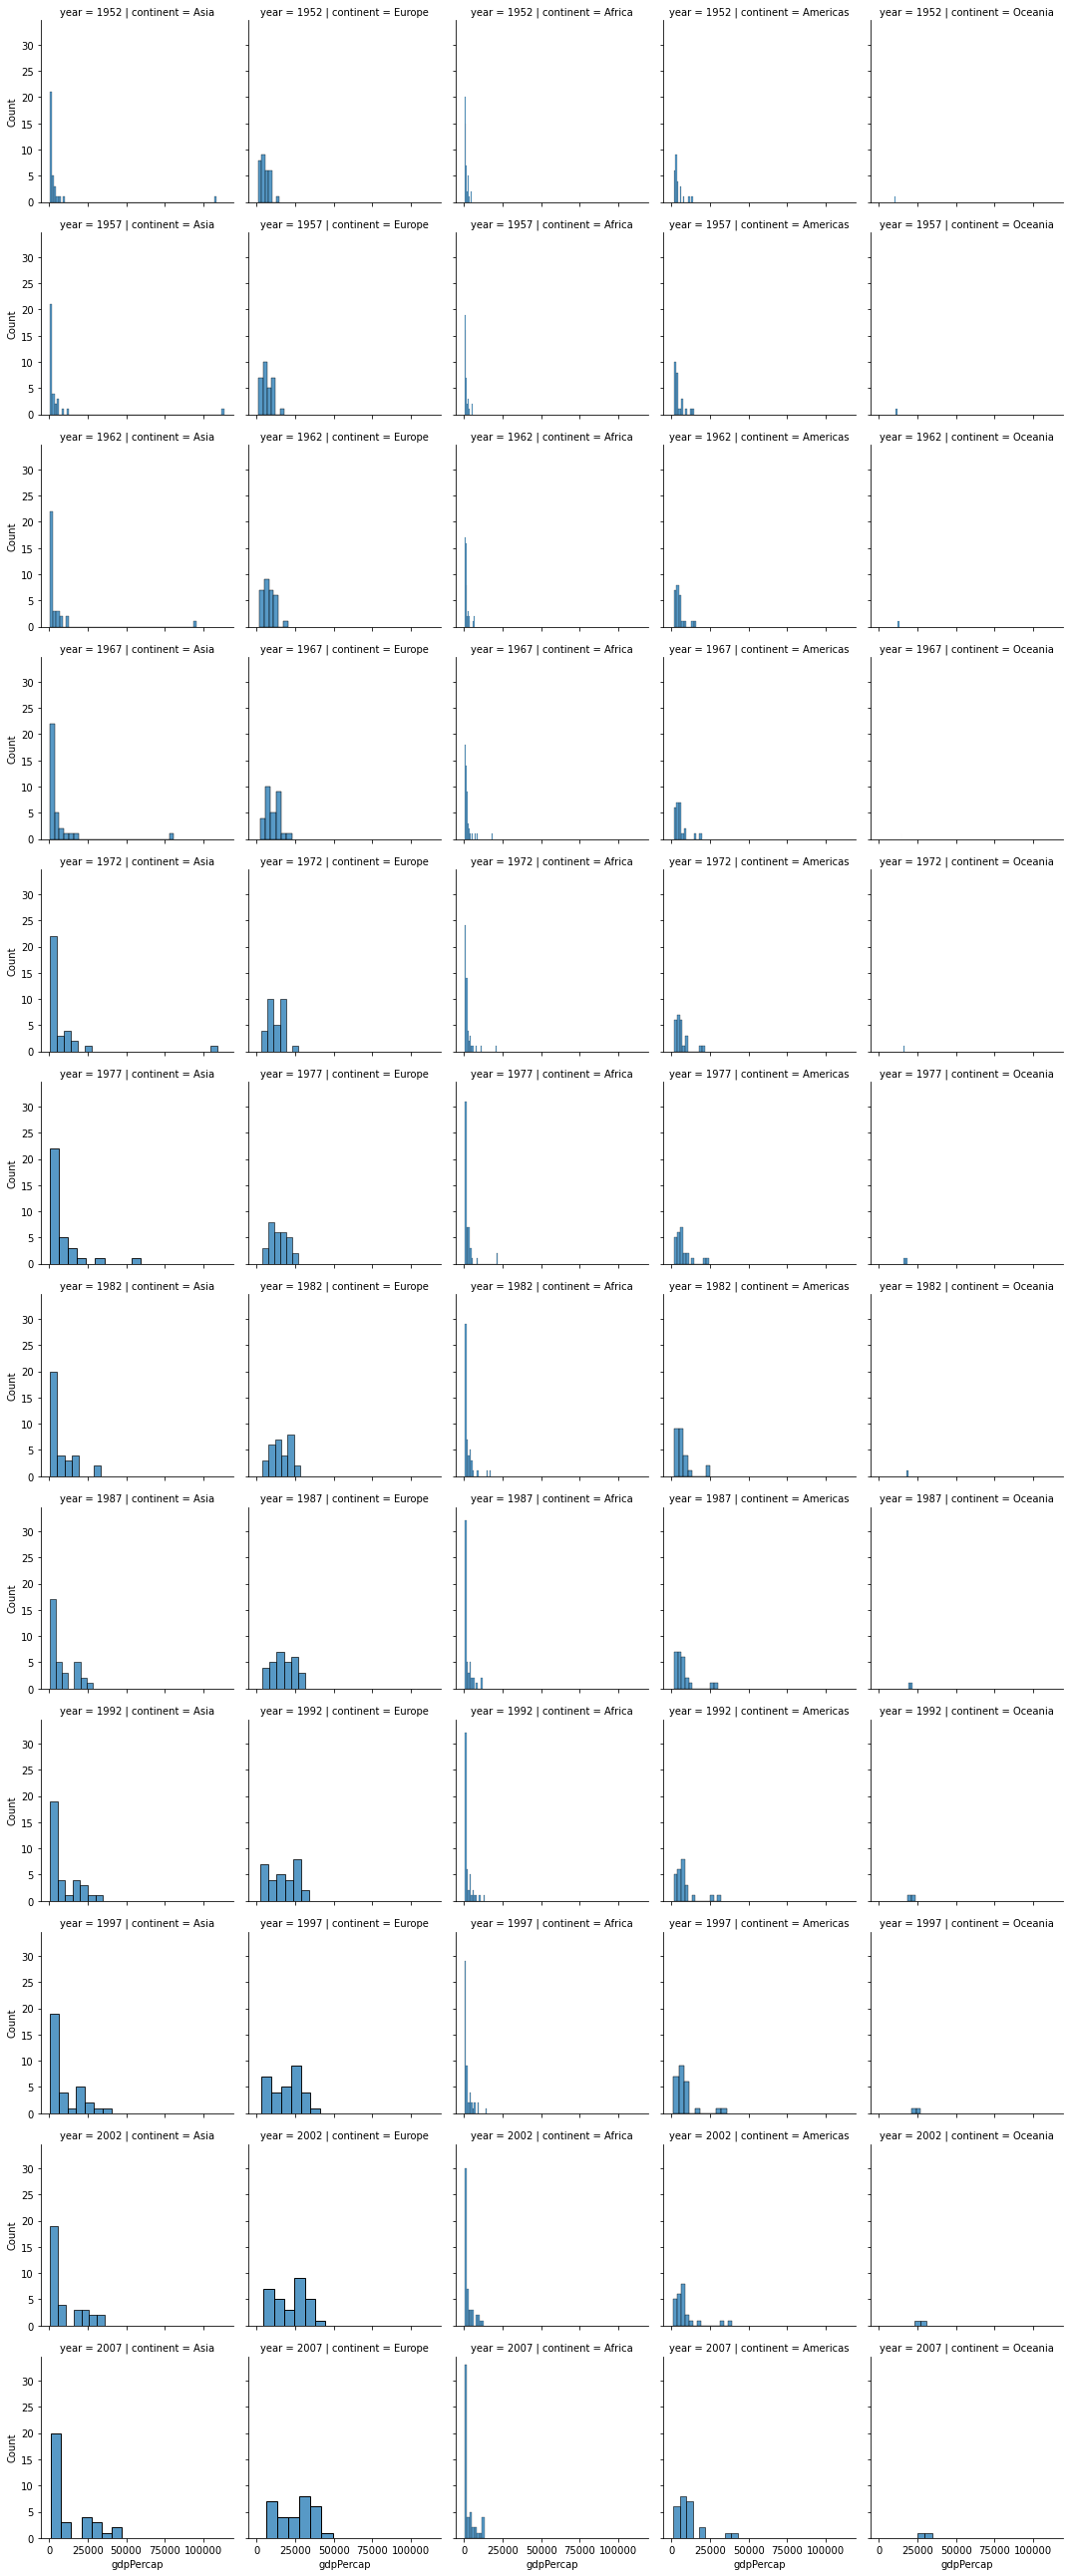

In [57]:
grid1 = sns.FacetGrid(df, col='continent', row='year')
grid1.map_dataframe(sns.histplot, x='gdpPercap')
plt.show()

In [58]:
df.query('year == 1952 & continent == "Asia"').sort_values(by = 'gdpPercap', ascending = False)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
852,Kuwait,Asia,1952,55.565,160000,108382.352900,KWT,414
84,Bahrain,Asia,1952,50.939,120447,9867.084765,BHR,48
1308,Saudi Arabia,Asia,1952,39.875,4005677,6459.554823,SAU,682
864,Lebanon,Asia,1952,55.928,1439529,4834.804067,LBN,422
732,Iraq,Asia,1952,45.320,5441766,4129.766056,IRQ,368
756,Israel,Asia,1952,65.390,1620914,4086.522128,ISR,376
792,Japan,Asia,1952,63.030,86459025,3216.956347,JPN,392
660,"Hong Kong, China",Asia,1952,60.960,2125900,3054.421209,HKG,344
720,Iran,Asia,1952,44.869,17272000,3035.326002,IRN,364
1356,Singapore,Asia,1952,60.396,1127000,2315.138227,SGP,702


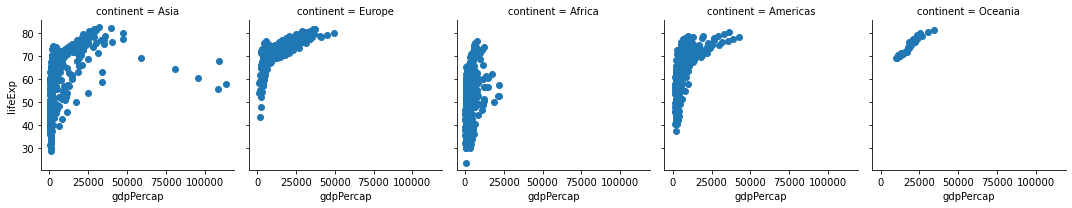

In [59]:
grid2 = sns.FacetGrid(df, col='continent')
grid2.map_dataframe(plt.scatter,'gdpPercap', 'lifeExp' )
plt.show()